In [1]:
# import pytensor
# pytensor.config.cxx = ""

# Notebook configuration
import pandas as pd
pd.options.display.max_rows = None

In [2]:
from physiokinematic.simulate import simulate
# Generate synthetic dataset
data = simulate(1, seed=1111)

In [3]:
data

,glong,glat,vlsr,e_vlsr,radius,true_te,te,e_te,line,e_line,...,line_freq,telescope,beam_area,Rgal,distance,log10_n,log10_q,log10_Rs,log10_em,kdar
0,287.207912,-1.252799,27.597739,1.0,150.207393,6495.135355,6495.135355,100.0,54.164529,0.1,...,8000.0,simulated,9178.029287,9.346608,7.566595,1.642584,49.074667,0.741166,4.327365,


In [4]:
from physiokinematic import model
import importlib
importlib.reload(model)

from physiokinematic.model import model as pkmodel
# setup model
datum = data.iloc[0].copy()
model = pkmodel(datum)

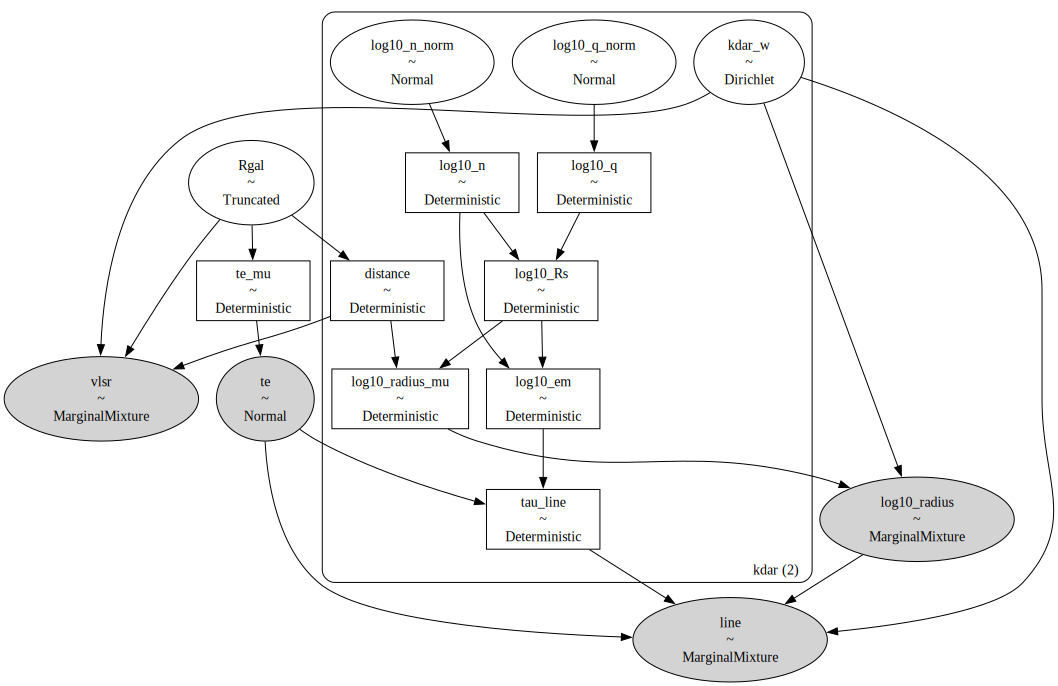

In [5]:
# visualize model
model.to_graphviz()

In [6]:
import pymc as pm

# sample prior predictive
with model:
    prior = pm.sample_prior_predictive(1000)

Sampling: [Rgal, kdar_w, line, log10_n_norm, log10_q_norm, log10_radius, te, vlsr]


Text(0, 0.5, 'Prior Probability Density')

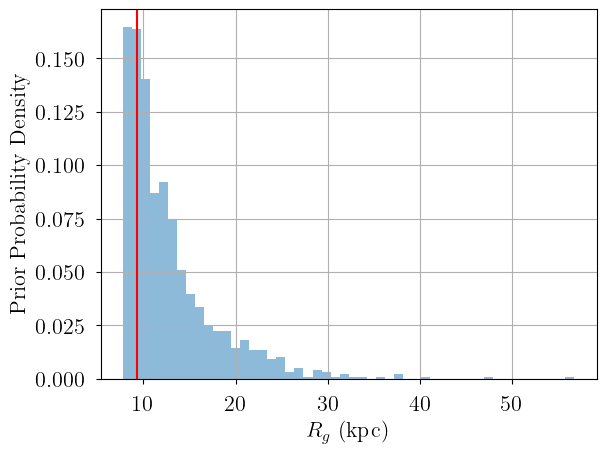

In [7]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(prior.prior["Rgal"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(datum["Rgal"], color="r")
ax.set_xlabel(r"$R_g$ (kpc)")
ax.set_ylabel("Prior Probability Density")

Text(0, 0.5, 'Prior Probability Density')

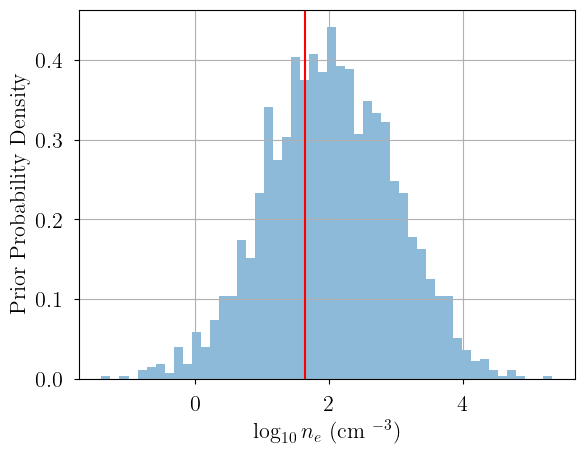

In [8]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(prior.prior["log10_n"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(datum["log10_n"], color="r")
ax.set_xlabel(r"$\log_{10} n_e$ (cm $^{-3}$)")
ax.set_ylabel("Prior Probability Density")

Text(0, 0.5, 'Prior Probability Density')

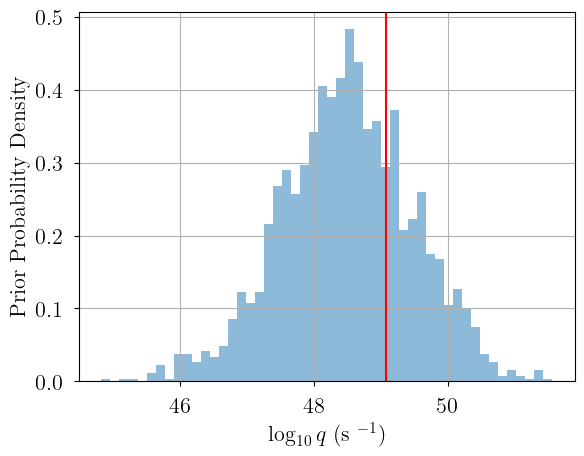

In [9]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(prior.prior["log10_q"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(datum["log10_q"], color="r")
ax.set_xlabel(r"$\log_{10} q$ (s $^{-1}$)")
ax.set_ylabel("Prior Probability Density")

Text(0, 0.5, 'Prior Probability Density')

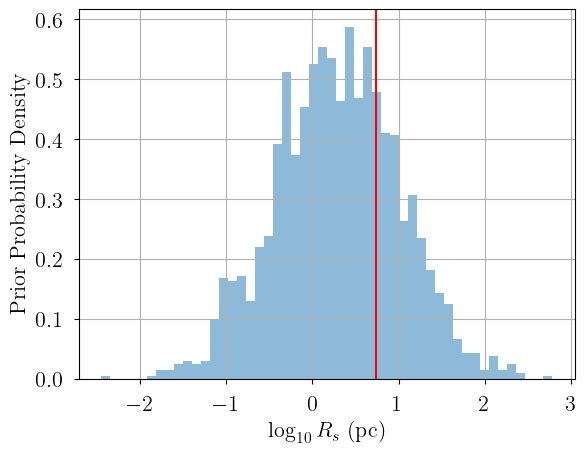

In [10]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(prior.prior["log10_Rs"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(datum["log10_Rs"], color="r")
ax.set_xlabel(r"$\log_{10} R_s$ (pc)")
ax.set_ylabel("Prior Probability Density")

Text(0, 0.5, 'Prior Probability Density')

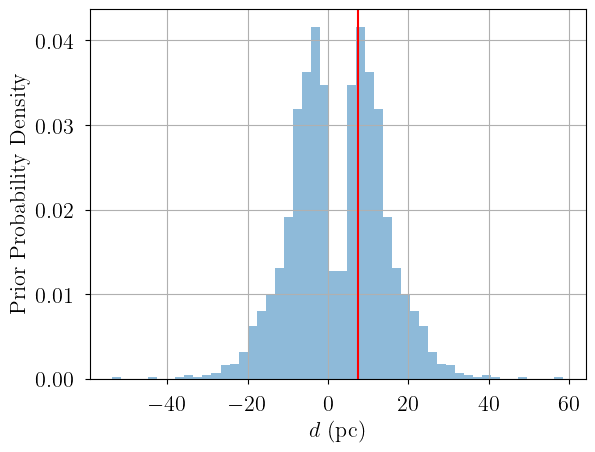

In [11]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(prior.prior["distance"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(datum["distance"], color="r")
ax.set_xlabel(r"$d$ (pc)")
ax.set_ylabel("Prior Probability Density")

Text(0, 0.5, 'Prior Probability Density')

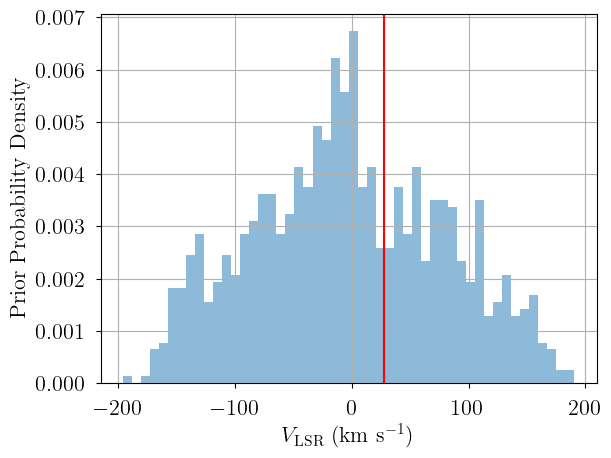

In [12]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(prior.prior_predictive["vlsr"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(datum["vlsr"], color="r")
ax.set_xlabel(r"$V_{\rm LSR}$ (km s$^{-1})$")
ax.set_ylabel("Prior Probability Density")

Text(0, 0.5, 'Prior Probability Density')

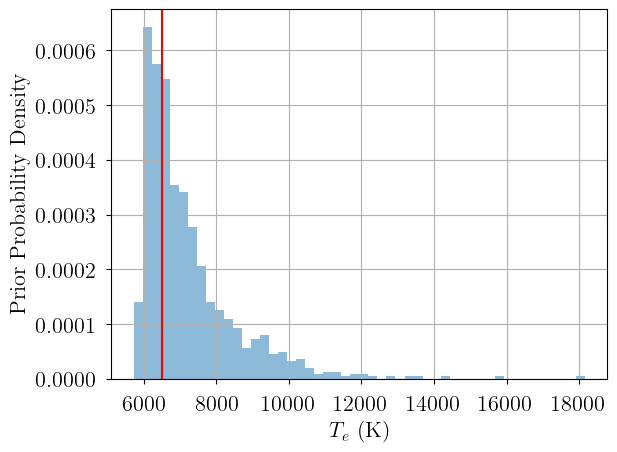

In [13]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(prior.prior_predictive["te"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(datum["te"], color="r")
ax.set_xlabel(r"$T_e$ (K)")
ax.set_ylabel("Prior Probability Density")

Text(0, 0.5, 'Prior Probability Density')

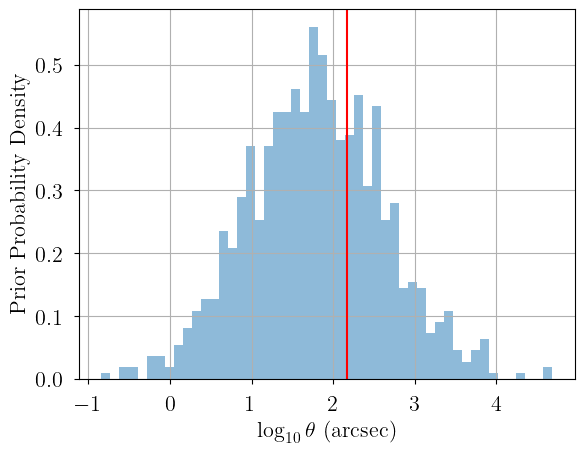

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(prior.prior_predictive["log10_radius"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(np.log10(datum["radius"]), color="r")
ax.set_xlabel(r"$\log_{10} \theta$ (arcsec)")
ax.set_ylabel("Prior Probability Density")

/tmp/ipykernel_230112/509190867.py:6: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(prior.prior_predictive["line"].data.flatten()), alpha=0.5, bins=50, density=True)


Text(0, 0.5, 'Prior Probability Density')

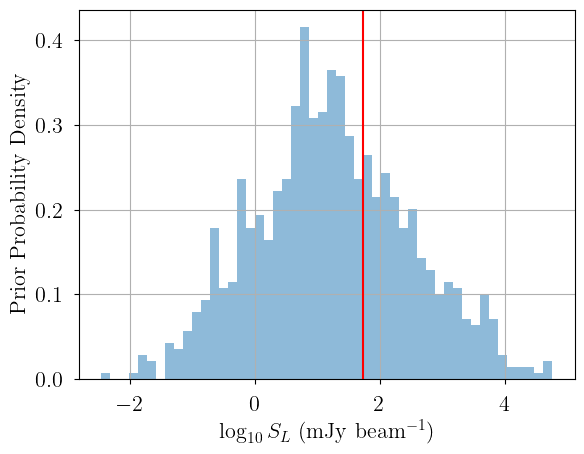

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(np.log10(prior.prior_predictive["line"].data.flatten()), alpha=0.5, bins=50, density=True)
ax.axvline(np.log10(datum["line"]), color="r")
ax.set_xlabel(r"$\log_{10} S_L$ (mJy beam$^{-1}$)")
ax.set_ylabel("Prior Probability Density")

In [16]:
with model:
    trace = pm.sample(init="advi+adapt_diag", chains=6, cores=6, tune=1000, draws=1000, target_accept=0.8)

Auto-assigning NUTS sampler...
Initializing NUTS using advi+adapt_diag...


Output()

Convergence achieved at 13000
Interrupted at 12,999 [6%]: Average Loss = 1.1423e+06
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [kdar_w, Rgal, log10_q_norm, log10_n_norm]


Output()

Sampling 6 chains for 1_000 tune and 1_000 draw iterations (6_000 + 6_000 draws total) took 592 seconds.
Chain 1 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
Chain 5 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [17]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
log10_q_norm[N],-0.061,0.742,-1.504,1.532,0.024,0.040,1097.0,946.0,1.07
log10_q_norm[F],0.211,0.863,-1.573,1.773,0.059,0.042,241.0,1429.0,1.08
log10_n_norm[N],-0.145,0.529,-1.254,1.067,0.010,0.059,1965.0,70.0,1.32
log10_n_norm[F],-0.229,0.714,-1.614,1.339,0.023,0.058,1039.0,727.0,1.31
kdar_w[N],0.441,0.252,0.003,0.841,0.056,0.040,20.0,98.0,1.21
kdar_w[F],0.559,0.252,0.159,0.997,0.056,0.042,20.0,98.0,1.21
Rgal,9.608,0.349,8.937,10.247,0.007,0.005,2583.0,2171.0,1.00
distance[N],-3.173,0.601,-4.273,-1.995,0.012,0.008,2583.0,2171.0,1.00
distance[F],8.005,0.601,6.827,9.104,0.012,0.008,2583.0,2171.0,1.00
te_mu,6402.103,87.253,6234.184,6561.630,1.697,1.200,2583.0,2171.0,1.00


In [18]:
# sample posterior predictive 
with model:
    posterior = pm.sample_posterior_predictive(trace.sel(draw=slice(None, None, 10)))

Sampling: [line, log10_radius, te, vlsr]


Output()

Text(0, 0.5, 'Posterior Probability Density')

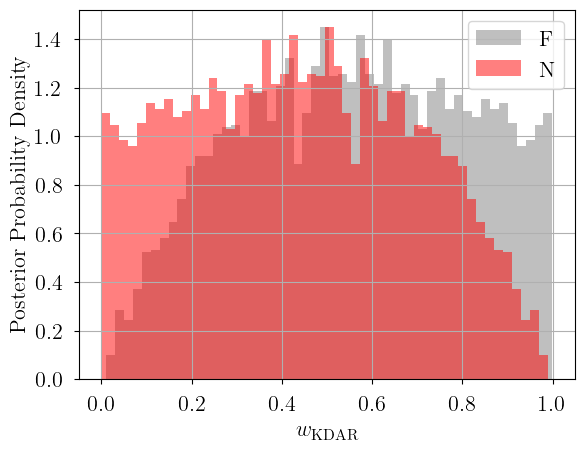

In [19]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(trace.posterior["kdar_w"].sel(kdar="F").data.flatten(), color="gray", alpha=0.5, bins=50, density=True, label="F")
ax.hist(trace.posterior["kdar_w"].sel(kdar="N").data.flatten(), color="red", alpha=0.5, bins=50, density=True, label="N")
ax.legend(loc="best")
ax.set_xlabel(r"$w_{\rm KDAR}$")
ax.set_ylabel("Posterior Probability Density")

Text(0, 0.5, 'Posterior Probability Density')

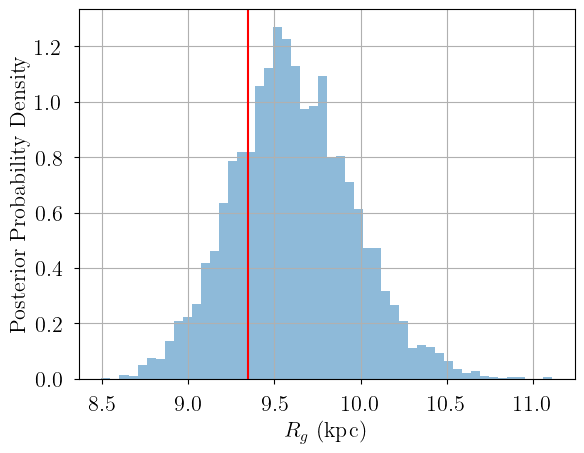

In [20]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(trace.posterior["Rgal"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(datum["Rgal"], color="r")
ax.set_xlabel(r"$R_g$ (kpc)")
ax.set_ylabel("Posterior Probability Density")

Text(0, 0.5, 'Posterior Probability Density')

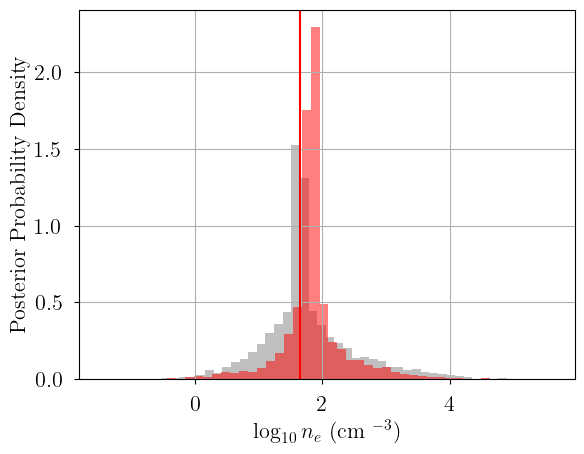

In [21]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(trace.posterior["log10_n"].sel(kdar="F").data.flatten(), color="gray", alpha=0.5, bins=50, density=True)
ax.hist(trace.posterior["log10_n"].sel(kdar="N").data.flatten(), color="red", alpha=0.5, bins=50, density=True)
ax.axvline(datum["log10_n"], color="r")
ax.set_xlabel(r"$\log_{10} n_e$ (cm $^{-3}$)")
ax.set_ylabel("Posterior Probability Density")

Text(0, 0.5, 'Posterior Probability Density')

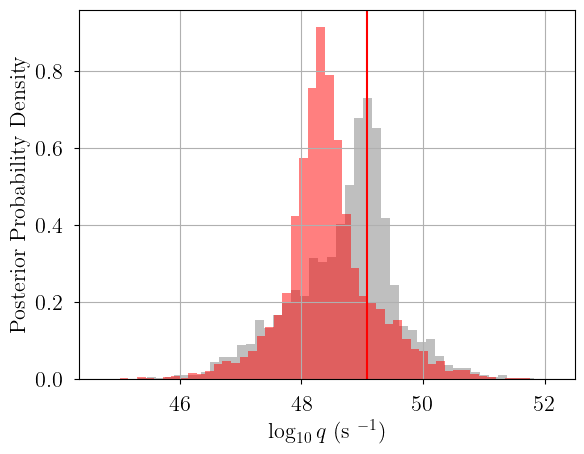

In [22]:
import matplotlib.pyplot as plt

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(trace.posterior["log10_q"].sel(kdar="F").data.flatten(), color="gray", alpha=0.5, bins=50, density=True)
ax.hist(trace.posterior["log10_q"].sel(kdar="N").data.flatten(), color="red", alpha=0.5, bins=50, density=True)
ax.axvline(datum["log10_q"], color="r")
ax.set_xlabel(r"$\log_{10} q$ (s $^{-1}$)")
ax.set_ylabel("Posterior Probability Density")

Text(0, 0.5, 'Prior Probability Density')

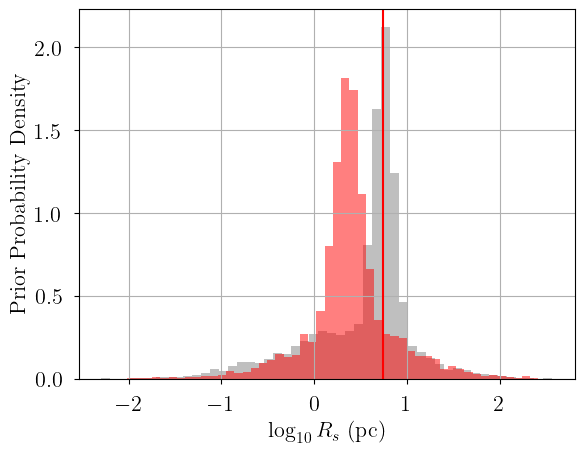

In [23]:
fig, ax = plt.subplots()
ax.hist(trace.posterior["log10_Rs"].sel(kdar="F").data.flatten(), color="gray", alpha=0.5, bins=50, density=True)
ax.hist(trace.posterior["log10_Rs"].sel(kdar="N").data.flatten(), color="red", alpha=0.5, bins=50, density=True)
ax.axvline(datum["log10_Rs"], color="r")
ax.set_xlabel(r"$\log_{10} R_s$ (pc)")
ax.set_ylabel("Prior Probability Density")

Text(0, 0.5, 'Prior Probability Density')

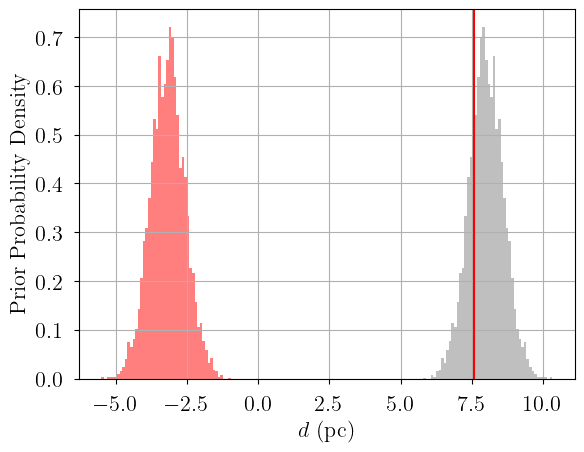

In [24]:
fig, ax = plt.subplots()
ax.hist(trace.posterior["distance"].sel(kdar="F").data.flatten(), color="gray", alpha=0.5, bins=50, density=True)
ax.hist(trace.posterior["distance"].sel(kdar="N").data.flatten(), color="red", alpha=0.5, bins=50, density=True)
ax.axvline(datum["distance"], color="r")
ax.set_xlabel(r"$d$ (pc)")
ax.set_ylabel("Prior Probability Density")

Text(0, 0.5, 'Posterior Probability Density')

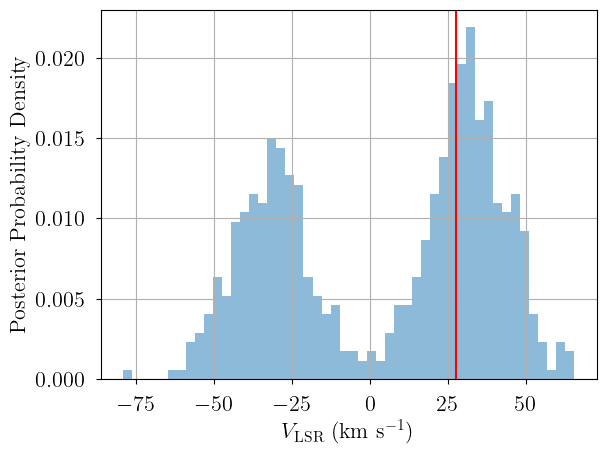

In [25]:
fig, ax = plt.subplots()
ax.hist(posterior.posterior_predictive["vlsr"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(datum["vlsr"], color="r")
ax.set_xlabel(r"$V_{\rm LSR}$ (km s$^{-1})$")
ax.set_ylabel("Posterior Probability Density")

Text(0, 0.5, 'Posterior Probability Density')

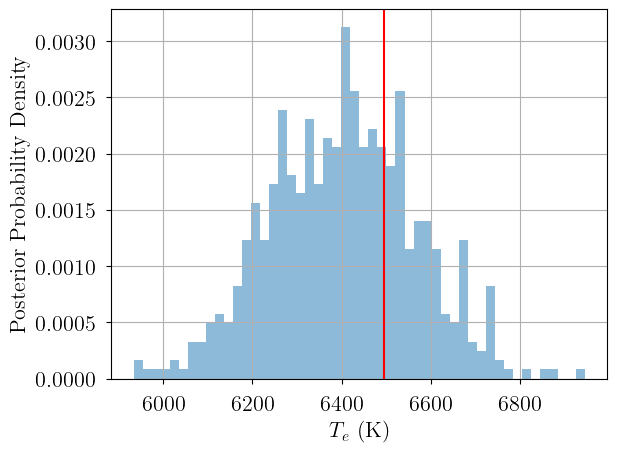

In [26]:
fig, ax = plt.subplots()
ax.hist(posterior.posterior_predictive["te"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(datum["te"], color="r")
ax.set_xlabel(r"$T_e$ (K)")
ax.set_ylabel("Posterior Probability Density")

Text(0, 0.5, 'Posterior Probability Density')

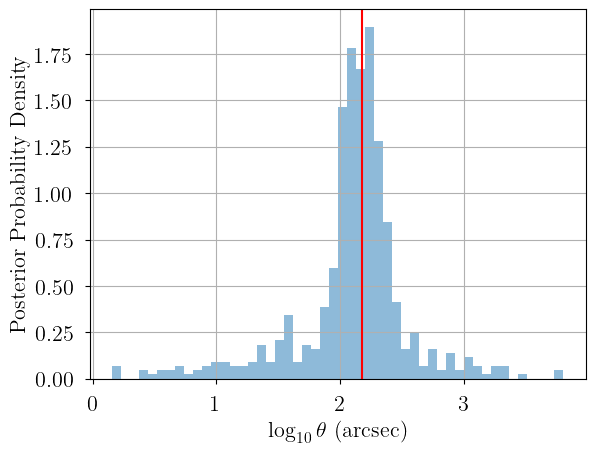

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# plot prior predictive samples
fig, ax = plt.subplots()
ax.hist(posterior.posterior_predictive["log10_radius"].data.flatten(), alpha=0.5, bins=50, density=True)
ax.axvline(np.log10(datum["radius"]), color="r")
ax.set_xlabel(r"$\log_{10} \theta$ (arcsec)")
ax.set_ylabel("Posterior Probability Density")

/tmp/ipykernel_230112/1034855640.py:2: RuntimeWarning: invalid value encountered in log10
  ax.hist(np.log10(posterior.posterior_predictive["line"].data.flatten()), alpha=0.5, bins=50, density=True)


Text(0, 0.5, 'Posterior Probability Density')

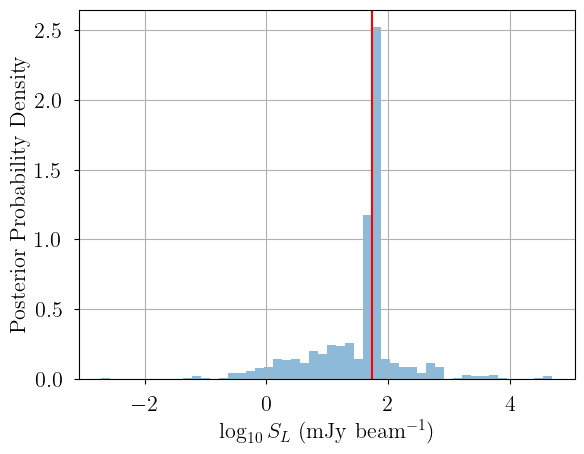

In [28]:
fig, ax = plt.subplots()
ax.hist(np.log10(posterior.posterior_predictive["line"].data.flatten()), alpha=0.5, bins=50, density=True)
ax.axvline(np.log10(datum["line"]), color="r")
ax.set_xlabel(r"$\log_{10} S_L$ (mJy beam$^{-1}$)")
ax.set_ylabel("Posterior Probability Density")